In [164]:
3x^2 = 3,
x^2 = 1,
x = +-1

12y^2 = 3,
y^2 = 1/4,
y = +- 1/2

225

In [165]:
def f(x, y):
    return x ** 3 + 4 * y ** 3 - 3 * x - 3 * y

In [166]:
f(1, 1/2), f(1, -1/2), f(-1, 1/2), f(-1, -1/2)

(-3.0, -1.0, 1.0, 3.0)

# Воронцов. Введение в машинное обучение
### Неделя 3.
#### Задание 1.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, make_scorer

import pandas as pd

In [3]:
df = pd.read_csv('abalone.csv')

In [12]:
sex_dict = {
    'M': 1,
    'I': 0,
    'F': -1
}
df['Sex'] = df['Sex'].map(sex_dict)

In [16]:
X, y = df.drop('Rings', axis=1), df['Rings']

In [30]:
clf = RandomForestRegressor(random_state=1)
grid = {'n_estimators': range(1, 51)}
scorer = make_scorer(r2_score)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
gs = GridSearchCV(clf, grid, scoring=scorer, cv=cv)

In [31]:
%%time
gs.fit(X, y)

CPU times: user 1min 29s, sys: 563 ms, total: 1min 29s
Wall time: 1min 30s


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(1, 51)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=make_scorer(r2_score),
       verbose=0)

In [43]:
for n, res in zip(gs.cv_results_['param_n_estimators'], gs.cv_results_['mean_test_score']):
    print(n, res, res > .52)

1 0.102163125849 False
2 0.338412959313 False
3 0.403584837629 False
4 0.442722234326 False
5 0.464020401671 False
6 0.470580138647 False
7 0.47582658808 False
8 0.481738243326 False
9 0.488342750783 False
10 0.494458152768 False
11 0.493391074362 False
12 0.497961126662 False
13 0.50213210699 False
14 0.506424775497 False
15 0.508328085298 False
16 0.510509452008 False
17 0.513845502985 False
18 0.516324176384 False
19 0.519031046713 False
20 0.518670729546 False
21 0.51983247513 False
22 0.520155890139 True
23 0.521015079498 True
24 0.522401328334 True
25 0.522615326396 True
26 0.523804761492 True
27 0.524120059055 True
28 0.525050806268 True
29 0.52596755301 True
30 0.526534754321 True
31 0.527096390596 True
32 0.52838584687 True
33 0.529612686174 True
34 0.529559798833 True
35 0.529513146047 True
36 0.529595647382 True
37 0.529127350278 True
38 0.529156227253 True
39 0.529236970941 True
40 0.529062998534 True
41 0.529338105916 True
42 0.529569243519 True
43 0.529371420704 True
44 0

#### Ответ на задание 1.

In [44]:
with open('1-1', 'w', encoding='utf-8') as f:
    f.write('22')

#### Задание 2.

In [109]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv('gbm-data.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [49]:
a = df.values

In [139]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:],
                                                    df.iloc[:, 0],
                                                    test_size=.8,
                                                    random_state=241)

In [140]:
def sigmoid(pred):
    return 1 / (1 + np.exp(-pred))

Loss function min - 0.5822942594278476 on iteration 0
Loss function min - 0.5582025523164261 on iteration 6
Loss function min - 0.5423141110024554 on iteration 10
Loss function min - 0.531094637596885 on iteration 36
Loss function min - 0.5269201872275844 on iteration 51
CPU times: user 42.9 s, sys: 249 ms, total: 43.2 s
Wall time: 43.2 s


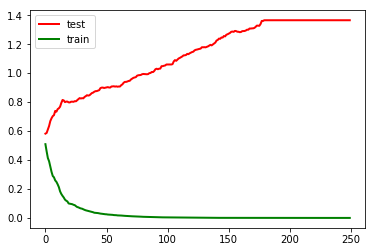

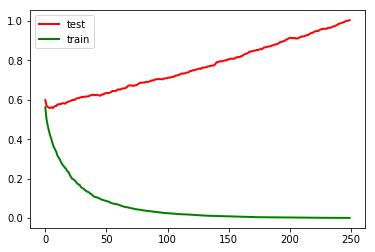

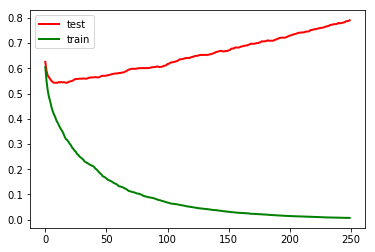

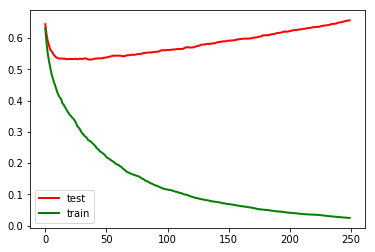

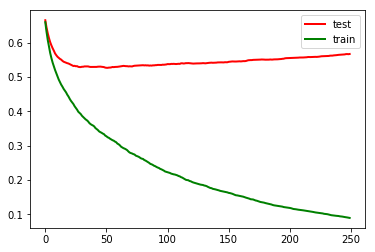

In [142]:
%%time 
min_losses = {}
for rate in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250,
#                                     verbose=True,
                                     random_state=241,
                                     learning_rate=rate)
    clf.fit(X_train, y_train)    

    
    train_loss = [ log_loss(y_train, pred) for pred in clf.staged_predict_proba(X_train)]
    test_loss = [ log_loss(y_test, pred) for pred in clf.staged_predict_proba(X_test)]
    best_iter = np.argmin(test_loss)
    min_losses[rate] = (test_loss[best_iter], best_iter)
    
    print(f"Loss function min - {test_loss[best_iter]} on iteration {best_iter}")
    
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [144]:
min_losses[.2]

(0.53109463759688502, 36)

In [145]:
with open('2-1', 'w', encoding='utf-8') as f:
    f.write('overfitting')
with open('2-2', 'w', encoding='utf-8') as f:
    f.write('0.53 36')

In [146]:
!cat 2-2

0.53 36

In [147]:
clf = RandomForestClassifier(n_estimators=36, random_state=241)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
ll = log_loss(y_test, y_pred)

In [148]:
with open('2-3', 'w', encoding='utf-8') as f:
    f.write(f"{ll:.2}")

In [149]:
!cat 2-3

0.54